In [3]:
import pandas as pd

wd = '/Users/ewenwang/Documents/practice_data/conversion_rate/'
test_file = ['round1_ijcai_18_test_a_20180301.txt', 'round2_ijcai_18_test_a_20180425.txt']

preprocess_file = ['round2_preprocess_0425.txt']
property_file = ['round2_property_0425.txt']

test_1_a = pd.read_csv(wd+test_file[0], sep=' ')
test_2_a = pd.read_csv(wd+test_file[1], sep=' ')

In [6]:
print('test_1_a shape: ', test_1_a.shape, 
      '\ntest_2_a shape: ', test_2_a.shape)

test_1_a shape:  (18371, 26) 
test_2_a shape:  (519888, 26)


In [7]:
for ind, val in enumerate(test_1_a.columns):
    print(val == test_2_a.columns[ind])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [16]:
preprocess_file = ['round2_preprocess_0425.txt']

data = pd.read_csv(wd+preprocess_file[0], sep=' ')

train = data[(data['day'] >= 18) & (data['day'] <= 23)]
valid = data[(data['day'] == 24)]
test = data[data.is_trade.isnull()]

In [27]:
data.realtime.tail()

997970    2018-09-07 18:55:20
997971    2018-09-07 19:30:43
997972    2018-09-07 21:48:01
997973    2018-09-07 19:15:02
997974    2018-09-07 13:50:18
Name: realtime, dtype: object

In [15]:
for i in test.columns:
    print(i)

context_id
context_page_id
context_timestamp
instance_id
is_trade
item_brand_id
item_category_list
item_city_id
item_collected_level
item_id
item_price_level
item_property_list
item_pv_level
item_sales_level
predict_category_property
shop_id
shop_review_num_level
shop_review_positive_rate
shop_score_delivery
shop_score_description
shop_score_service
shop_star_level
user_age_level
user_gender_id
user_id
user_occupation_id
user_star_level
len_item_category_list
len_item_property_list
len_predict_category_property
item_category_list_1
item_category_list_2
item_property_list_0
item_property_list_1
item_property_list_2
item_property_list_3
item_property_list_4
item_property_list_5
item_property_list_6
item_property_list_7
item_property_list_8
item_property_list_9
gender_bin
occupation_bin
star_bin
predict_category_property_0
predict_category_property_1
predict_category_property_2
predict_category_property_3
predict_category_property_4
realtime
day
hour
item_property_prob


In [18]:
features = ['shop_review_num_level', 'shop_review_positive_rate', 'shop_score_delivery', 'shop_score_description', 'shop_score_service', 'shop_star_level', 
            'user_age_level', 'user_gender_id', 'user_occupation_id', 'user_star_level', 'hour']
target = 'is_trade'

In [13]:
import matplotlib.pyplot as plt
import pandas_profiling as pp
import warnings 
warnings.filterwarnings('ignore')

pp.ProfileReport(test[features])

Number of variables,48
Number of observations,519888
Total Missing (%),0.0%
Total size in memory,190.4 MiB
Average record size in memory,384.0 B
Numeric,38
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,8


In [20]:
import lightgbm as lgb

X = train[features]
y = train[target].values
X_tes = valid[features]
y_tes = valid[target].values

print('Training LGBM model...')
lgb0 = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    num_leaves=16,
    depth=4,
    learning_rate=0.01,
    seed=2018,
    colsample_bytree=0.6,
    subsample=0.9,
    n_estimators=20000,
    silent = True)

lgb_model = lgb0.fit(X, y, eval_set=[(X_tes, y_tes)], early_stopping_rounds=200)

Training LGBM model...
[1]	valid_0's binary_logloss: 0.683891
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.674815
[3]	valid_0's binary_logloss: 0.665918
[4]	valid_0's binary_logloss: 0.657196
[5]	valid_0's binary_logloss: 0.648647
[6]	valid_0's binary_logloss: 0.640259
[7]	valid_0's binary_logloss: 0.632033
[8]	valid_0's binary_logloss: 0.623954
[9]	valid_0's binary_logloss: 0.61603
[10]	valid_0's binary_logloss: 0.608252
[11]	valid_0's binary_logloss: 0.600616
[12]	valid_0's binary_logloss: 0.593112
[13]	valid_0's binary_logloss: 0.585746
[14]	valid_0's binary_logloss: 0.578515
[15]	valid_0's binary_logloss: 0.571414
[16]	valid_0's binary_logloss: 0.564438
[17]	valid_0's binary_logloss: 0.557585
[18]	valid_0's binary_logloss: 0.550851
[19]	valid_0's binary_logloss: 0.544229
[20]	valid_0's binary_logloss: 0.537724
[21]	valid_0's binary_logloss: 0.531329
[22]	valid_0's binary_logloss: 0.525048
[23]	valid_0's binary_logloss: 0.51887
[24]	

[209]	valid_0's binary_logloss: 0.122543
[210]	valid_0's binary_logloss: 0.122041
[211]	valid_0's binary_logloss: 0.121541
[212]	valid_0's binary_logloss: 0.12105
[213]	valid_0's binary_logloss: 0.120563
[214]	valid_0's binary_logloss: 0.120083
[215]	valid_0's binary_logloss: 0.119612
[216]	valid_0's binary_logloss: 0.119145
[217]	valid_0's binary_logloss: 0.118683
[218]	valid_0's binary_logloss: 0.118229
[219]	valid_0's binary_logloss: 0.117778
[220]	valid_0's binary_logloss: 0.117332
[221]	valid_0's binary_logloss: 0.116895
[222]	valid_0's binary_logloss: 0.116461
[223]	valid_0's binary_logloss: 0.116033
[224]	valid_0's binary_logloss: 0.11561
[225]	valid_0's binary_logloss: 0.115193
[226]	valid_0's binary_logloss: 0.114782
[227]	valid_0's binary_logloss: 0.114376
[228]	valid_0's binary_logloss: 0.113975
[229]	valid_0's binary_logloss: 0.113579
[230]	valid_0's binary_logloss: 0.11319
[231]	valid_0's binary_logloss: 0.112804
[232]	valid_0's binary_logloss: 0.112423
[233]	valid_0's bin

[411]	valid_0's binary_logloss: 0.0866265
[412]	valid_0's binary_logloss: 0.0865942
[413]	valid_0's binary_logloss: 0.0865634
[414]	valid_0's binary_logloss: 0.0865325
[415]	valid_0's binary_logloss: 0.0865019
[416]	valid_0's binary_logloss: 0.0864722
[417]	valid_0's binary_logloss: 0.0864422
[418]	valid_0's binary_logloss: 0.0864127
[419]	valid_0's binary_logloss: 0.0863814
[420]	valid_0's binary_logloss: 0.0863532
[421]	valid_0's binary_logloss: 0.0863252
[422]	valid_0's binary_logloss: 0.0862963
[423]	valid_0's binary_logloss: 0.0862689
[424]	valid_0's binary_logloss: 0.0862425
[425]	valid_0's binary_logloss: 0.0862172
[426]	valid_0's binary_logloss: 0.0861903
[427]	valid_0's binary_logloss: 0.086165
[428]	valid_0's binary_logloss: 0.0861392
[429]	valid_0's binary_logloss: 0.0861141
[430]	valid_0's binary_logloss: 0.08609
[431]	valid_0's binary_logloss: 0.0860649
[432]	valid_0's binary_logloss: 0.0860408
[433]	valid_0's binary_logloss: 0.086017
[434]	valid_0's binary_logloss: 0.0859

[609]	valid_0's binary_logloss: 0.0843974
[610]	valid_0's binary_logloss: 0.0843954
[611]	valid_0's binary_logloss: 0.0843921
[612]	valid_0's binary_logloss: 0.0843898
[613]	valid_0's binary_logloss: 0.0843856
[614]	valid_0's binary_logloss: 0.0843834
[615]	valid_0's binary_logloss: 0.0843815
[616]	valid_0's binary_logloss: 0.0843796
[617]	valid_0's binary_logloss: 0.0843759
[618]	valid_0's binary_logloss: 0.0843736
[619]	valid_0's binary_logloss: 0.0843712
[620]	valid_0's binary_logloss: 0.0843686
[621]	valid_0's binary_logloss: 0.0843672
[622]	valid_0's binary_logloss: 0.0843634
[623]	valid_0's binary_logloss: 0.084361
[624]	valid_0's binary_logloss: 0.0843585
[625]	valid_0's binary_logloss: 0.0843563
[626]	valid_0's binary_logloss: 0.0843548
[627]	valid_0's binary_logloss: 0.084352
[628]	valid_0's binary_logloss: 0.0843501
[629]	valid_0's binary_logloss: 0.0843484
[630]	valid_0's binary_logloss: 0.0843448
[631]	valid_0's binary_logloss: 0.0843427
[632]	valid_0's binary_logloss: 0.08

[813]	valid_0's binary_logloss: 0.084128
[814]	valid_0's binary_logloss: 0.0841266
[815]	valid_0's binary_logloss: 0.0841264
[816]	valid_0's binary_logloss: 0.0841251
[817]	valid_0's binary_logloss: 0.0841247
[818]	valid_0's binary_logloss: 0.0841216
[819]	valid_0's binary_logloss: 0.0841206
[820]	valid_0's binary_logloss: 0.0841195
[821]	valid_0's binary_logloss: 0.0841207
[822]	valid_0's binary_logloss: 0.0841208
[823]	valid_0's binary_logloss: 0.0841202
[824]	valid_0's binary_logloss: 0.0841185
[825]	valid_0's binary_logloss: 0.0841184
[826]	valid_0's binary_logloss: 0.0841188
[827]	valid_0's binary_logloss: 0.0841182
[828]	valid_0's binary_logloss: 0.0841179
[829]	valid_0's binary_logloss: 0.0841176
[830]	valid_0's binary_logloss: 0.0841183
[831]	valid_0's binary_logloss: 0.0841184
[832]	valid_0's binary_logloss: 0.0841163
[833]	valid_0's binary_logloss: 0.0841166
[834]	valid_0's binary_logloss: 0.0841129
[835]	valid_0's binary_logloss: 0.0841114
[836]	valid_0's binary_logloss: 0.0

[1015]	valid_0's binary_logloss: 0.0840285
[1016]	valid_0's binary_logloss: 0.0840273
[1017]	valid_0's binary_logloss: 0.0840279
[1018]	valid_0's binary_logloss: 0.0840274
[1019]	valid_0's binary_logloss: 0.0840285
[1020]	valid_0's binary_logloss: 0.0840276
[1021]	valid_0's binary_logloss: 0.084028
[1022]	valid_0's binary_logloss: 0.0840269
[1023]	valid_0's binary_logloss: 0.0840273
[1024]	valid_0's binary_logloss: 0.0840274
[1025]	valid_0's binary_logloss: 0.0840274
[1026]	valid_0's binary_logloss: 0.0840267
[1027]	valid_0's binary_logloss: 0.0840259
[1028]	valid_0's binary_logloss: 0.0840263
[1029]	valid_0's binary_logloss: 0.0840248
[1030]	valid_0's binary_logloss: 0.0840239
[1031]	valid_0's binary_logloss: 0.0840219
[1032]	valid_0's binary_logloss: 0.0840215
[1033]	valid_0's binary_logloss: 0.0840198
[1034]	valid_0's binary_logloss: 0.0840196
[1035]	valid_0's binary_logloss: 0.084019
[1036]	valid_0's binary_logloss: 0.0840192
[1037]	valid_0's binary_logloss: 0.0840191
[1038]	valid_

[1208]	valid_0's binary_logloss: 0.0839451
[1209]	valid_0's binary_logloss: 0.0839451
[1210]	valid_0's binary_logloss: 0.0839457
[1211]	valid_0's binary_logloss: 0.0839443
[1212]	valid_0's binary_logloss: 0.0839439
[1213]	valid_0's binary_logloss: 0.0839427
[1214]	valid_0's binary_logloss: 0.0839415
[1215]	valid_0's binary_logloss: 0.0839405
[1216]	valid_0's binary_logloss: 0.0839406
[1217]	valid_0's binary_logloss: 0.0839396
[1218]	valid_0's binary_logloss: 0.0839398
[1219]	valid_0's binary_logloss: 0.0839398
[1220]	valid_0's binary_logloss: 0.0839403
[1221]	valid_0's binary_logloss: 0.0839405
[1222]	valid_0's binary_logloss: 0.0839404
[1223]	valid_0's binary_logloss: 0.0839401
[1224]	valid_0's binary_logloss: 0.0839405
[1225]	valid_0's binary_logloss: 0.0839398
[1226]	valid_0's binary_logloss: 0.08394
[1227]	valid_0's binary_logloss: 0.0839386
[1228]	valid_0's binary_logloss: 0.0839371
[1229]	valid_0's binary_logloss: 0.083937
[1230]	valid_0's binary_logloss: 0.0839374
[1231]	valid_0

[1403]	valid_0's binary_logloss: 0.0838905
[1404]	valid_0's binary_logloss: 0.0838901
[1405]	valid_0's binary_logloss: 0.0838903
[1406]	valid_0's binary_logloss: 0.0838905
[1407]	valid_0's binary_logloss: 0.0838905
[1408]	valid_0's binary_logloss: 0.0838905
[1409]	valid_0's binary_logloss: 0.0838908
[1410]	valid_0's binary_logloss: 0.0838901
[1411]	valid_0's binary_logloss: 0.0838898
[1412]	valid_0's binary_logloss: 0.0838889
[1413]	valid_0's binary_logloss: 0.0838884
[1414]	valid_0's binary_logloss: 0.083888
[1415]	valid_0's binary_logloss: 0.0838883
[1416]	valid_0's binary_logloss: 0.0838879
[1417]	valid_0's binary_logloss: 0.0838864
[1418]	valid_0's binary_logloss: 0.0838855
[1419]	valid_0's binary_logloss: 0.0838834
[1420]	valid_0's binary_logloss: 0.0838832
[1421]	valid_0's binary_logloss: 0.0838824
[1422]	valid_0's binary_logloss: 0.083883
[1423]	valid_0's binary_logloss: 0.0838827
[1424]	valid_0's binary_logloss: 0.0838832
[1425]	valid_0's binary_logloss: 0.0838828
[1426]	valid_

[1604]	valid_0's binary_logloss: 0.0838317
[1605]	valid_0's binary_logloss: 0.0838321
[1606]	valid_0's binary_logloss: 0.0838329
[1607]	valid_0's binary_logloss: 0.0838321
[1608]	valid_0's binary_logloss: 0.0838302
[1609]	valid_0's binary_logloss: 0.08383
[1610]	valid_0's binary_logloss: 0.0838301
[1611]	valid_0's binary_logloss: 0.0838291
[1612]	valid_0's binary_logloss: 0.0838295
[1613]	valid_0's binary_logloss: 0.083829
[1614]	valid_0's binary_logloss: 0.083829
[1615]	valid_0's binary_logloss: 0.0838299
[1616]	valid_0's binary_logloss: 0.0838312
[1617]	valid_0's binary_logloss: 0.0838318
[1618]	valid_0's binary_logloss: 0.0838313
[1619]	valid_0's binary_logloss: 0.0838311
[1620]	valid_0's binary_logloss: 0.0838299
[1621]	valid_0's binary_logloss: 0.0838294
[1622]	valid_0's binary_logloss: 0.0838294
[1623]	valid_0's binary_logloss: 0.0838286
[1624]	valid_0's binary_logloss: 0.0838285
[1625]	valid_0's binary_logloss: 0.083829
[1626]	valid_0's binary_logloss: 0.0838291
[1627]	valid_0's

[1797]	valid_0's binary_logloss: 0.0837561
[1798]	valid_0's binary_logloss: 0.0837571
[1799]	valid_0's binary_logloss: 0.0837572
[1800]	valid_0's binary_logloss: 0.0837558
[1801]	valid_0's binary_logloss: 0.083755
[1802]	valid_0's binary_logloss: 0.083755
[1803]	valid_0's binary_logloss: 0.0837552
[1804]	valid_0's binary_logloss: 0.0837541
[1805]	valid_0's binary_logloss: 0.0837544
[1806]	valid_0's binary_logloss: 0.0837543
[1807]	valid_0's binary_logloss: 0.0837537
[1808]	valid_0's binary_logloss: 0.0837513
[1809]	valid_0's binary_logloss: 0.0837514
[1810]	valid_0's binary_logloss: 0.0837508
[1811]	valid_0's binary_logloss: 0.0837506
[1812]	valid_0's binary_logloss: 0.0837502
[1813]	valid_0's binary_logloss: 0.0837498
[1814]	valid_0's binary_logloss: 0.0837489
[1815]	valid_0's binary_logloss: 0.0837492
[1816]	valid_0's binary_logloss: 0.0837503
[1817]	valid_0's binary_logloss: 0.0837499
[1818]	valid_0's binary_logloss: 0.0837494
[1819]	valid_0's binary_logloss: 0.0837486
[1820]	valid_

[1993]	valid_0's binary_logloss: 0.0837074
[1994]	valid_0's binary_logloss: 0.0837074
[1995]	valid_0's binary_logloss: 0.0837075
[1996]	valid_0's binary_logloss: 0.0837077
[1997]	valid_0's binary_logloss: 0.0837059
[1998]	valid_0's binary_logloss: 0.0837052
[1999]	valid_0's binary_logloss: 0.083705
[2000]	valid_0's binary_logloss: 0.083705
[2001]	valid_0's binary_logloss: 0.0837045
[2002]	valid_0's binary_logloss: 0.0837046
[2003]	valid_0's binary_logloss: 0.0837047
[2004]	valid_0's binary_logloss: 0.0837031
[2005]	valid_0's binary_logloss: 0.0837019
[2006]	valid_0's binary_logloss: 0.0837018
[2007]	valid_0's binary_logloss: 0.0837036
[2008]	valid_0's binary_logloss: 0.0837033
[2009]	valid_0's binary_logloss: 0.0837034
[2010]	valid_0's binary_logloss: 0.0837039
[2011]	valid_0's binary_logloss: 0.0837037
[2012]	valid_0's binary_logloss: 0.0837028
[2013]	valid_0's binary_logloss: 0.0837034
[2014]	valid_0's binary_logloss: 0.0837025
[2015]	valid_0's binary_logloss: 0.0837018
[2016]	valid_

[2191]	valid_0's binary_logloss: 0.0836626
[2192]	valid_0's binary_logloss: 0.0836622
[2193]	valid_0's binary_logloss: 0.0836619
[2194]	valid_0's binary_logloss: 0.0836626
[2195]	valid_0's binary_logloss: 0.0836639
[2196]	valid_0's binary_logloss: 0.0836632
[2197]	valid_0's binary_logloss: 0.0836634
[2198]	valid_0's binary_logloss: 0.0836637
[2199]	valid_0's binary_logloss: 0.0836636
[2200]	valid_0's binary_logloss: 0.0836627
[2201]	valid_0's binary_logloss: 0.0836618
[2202]	valid_0's binary_logloss: 0.0836618
[2203]	valid_0's binary_logloss: 0.0836618
[2204]	valid_0's binary_logloss: 0.0836613
[2205]	valid_0's binary_logloss: 0.083661
[2206]	valid_0's binary_logloss: 0.0836608
[2207]	valid_0's binary_logloss: 0.083661
[2208]	valid_0's binary_logloss: 0.0836614
[2209]	valid_0's binary_logloss: 0.0836601
[2210]	valid_0's binary_logloss: 0.0836597
[2211]	valid_0's binary_logloss: 0.0836597
[2212]	valid_0's binary_logloss: 0.0836601
[2213]	valid_0's binary_logloss: 0.08366
[2214]	valid_0'

[2383]	valid_0's binary_logloss: 0.0836338
[2384]	valid_0's binary_logloss: 0.083634
[2385]	valid_0's binary_logloss: 0.0836342
[2386]	valid_0's binary_logloss: 0.0836341
[2387]	valid_0's binary_logloss: 0.0836339
[2388]	valid_0's binary_logloss: 0.083634
[2389]	valid_0's binary_logloss: 0.0836336
[2390]	valid_0's binary_logloss: 0.0836343
[2391]	valid_0's binary_logloss: 0.0836349
[2392]	valid_0's binary_logloss: 0.0836357
[2393]	valid_0's binary_logloss: 0.083635
[2394]	valid_0's binary_logloss: 0.0836352
[2395]	valid_0's binary_logloss: 0.0836335
[2396]	valid_0's binary_logloss: 0.0836336
[2397]	valid_0's binary_logloss: 0.0836336
[2398]	valid_0's binary_logloss: 0.0836333
[2399]	valid_0's binary_logloss: 0.083633
[2400]	valid_0's binary_logloss: 0.0836324
[2401]	valid_0's binary_logloss: 0.0836325
[2402]	valid_0's binary_logloss: 0.0836336
[2403]	valid_0's binary_logloss: 0.0836343
[2404]	valid_0's binary_logloss: 0.0836352
[2405]	valid_0's binary_logloss: 0.0836321
[2406]	valid_0'

[2578]	valid_0's binary_logloss: 0.0836175
[2579]	valid_0's binary_logloss: 0.0836175
[2580]	valid_0's binary_logloss: 0.083618
[2581]	valid_0's binary_logloss: 0.0836176
[2582]	valid_0's binary_logloss: 0.0836182
[2583]	valid_0's binary_logloss: 0.0836177
[2584]	valid_0's binary_logloss: 0.0836169
[2585]	valid_0's binary_logloss: 0.083617
[2586]	valid_0's binary_logloss: 0.083617
[2587]	valid_0's binary_logloss: 0.0836174
[2588]	valid_0's binary_logloss: 0.0836186
[2589]	valid_0's binary_logloss: 0.0836187
[2590]	valid_0's binary_logloss: 0.0836188
[2591]	valid_0's binary_logloss: 0.0836191
[2592]	valid_0's binary_logloss: 0.083619
[2593]	valid_0's binary_logloss: 0.0836187
[2594]	valid_0's binary_logloss: 0.0836193
[2595]	valid_0's binary_logloss: 0.0836185
[2596]	valid_0's binary_logloss: 0.0836183
[2597]	valid_0's binary_logloss: 0.0836183
[2598]	valid_0's binary_logloss: 0.0836174
[2599]	valid_0's binary_logloss: 0.0836167
[2600]	valid_0's binary_logloss: 0.0836177
[2601]	valid_0'

[2770]	valid_0's binary_logloss: 0.0835904
[2771]	valid_0's binary_logloss: 0.0835899
[2772]	valid_0's binary_logloss: 0.0835917
[2773]	valid_0's binary_logloss: 0.0835918
[2774]	valid_0's binary_logloss: 0.0835921
[2775]	valid_0's binary_logloss: 0.0835924
[2776]	valid_0's binary_logloss: 0.0835917
[2777]	valid_0's binary_logloss: 0.0835919
[2778]	valid_0's binary_logloss: 0.0835912
[2779]	valid_0's binary_logloss: 0.0835909
[2780]	valid_0's binary_logloss: 0.0835913
[2781]	valid_0's binary_logloss: 0.0835908
[2782]	valid_0's binary_logloss: 0.0835906
[2783]	valid_0's binary_logloss: 0.0835907
[2784]	valid_0's binary_logloss: 0.0835907
[2785]	valid_0's binary_logloss: 0.0835907
[2786]	valid_0's binary_logloss: 0.0835906
[2787]	valid_0's binary_logloss: 0.083592
[2788]	valid_0's binary_logloss: 0.0835919
[2789]	valid_0's binary_logloss: 0.0835918
[2790]	valid_0's binary_logloss: 0.0835915
[2791]	valid_0's binary_logloss: 0.0835921
[2792]	valid_0's binary_logloss: 0.0835921
[2793]	valid

[2963]	valid_0's binary_logloss: 0.0835879
[2964]	valid_0's binary_logloss: 0.0835889
[2965]	valid_0's binary_logloss: 0.0835882
[2966]	valid_0's binary_logloss: 0.0835884
[2967]	valid_0's binary_logloss: 0.0835875
[2968]	valid_0's binary_logloss: 0.0835872
[2969]	valid_0's binary_logloss: 0.0835874
[2970]	valid_0's binary_logloss: 0.0835873
[2971]	valid_0's binary_logloss: 0.0835878
[2972]	valid_0's binary_logloss: 0.0835873
[2973]	valid_0's binary_logloss: 0.0835871
[2974]	valid_0's binary_logloss: 0.0835872
[2975]	valid_0's binary_logloss: 0.0835878
[2976]	valid_0's binary_logloss: 0.0835882
[2977]	valid_0's binary_logloss: 0.0835887
[2978]	valid_0's binary_logloss: 0.0835894
[2979]	valid_0's binary_logloss: 0.0835897
[2980]	valid_0's binary_logloss: 0.0835889
[2981]	valid_0's binary_logloss: 0.0835885
[2982]	valid_0's binary_logloss: 0.0835882
[2983]	valid_0's binary_logloss: 0.0835884
[2984]	valid_0's binary_logloss: 0.0835887
[2985]	valid_0's binary_logloss: 0.0835886
[2986]	vali

[3154]	valid_0's binary_logloss: 0.0835786
[3155]	valid_0's binary_logloss: 0.0835789
[3156]	valid_0's binary_logloss: 0.0835788
[3157]	valid_0's binary_logloss: 0.0835791
[3158]	valid_0's binary_logloss: 0.083579
[3159]	valid_0's binary_logloss: 0.0835781
[3160]	valid_0's binary_logloss: 0.083578
[3161]	valid_0's binary_logloss: 0.0835788
[3162]	valid_0's binary_logloss: 0.0835793
[3163]	valid_0's binary_logloss: 0.0835793
[3164]	valid_0's binary_logloss: 0.0835786
[3165]	valid_0's binary_logloss: 0.0835777
[3166]	valid_0's binary_logloss: 0.0835774
[3167]	valid_0's binary_logloss: 0.0835783
[3168]	valid_0's binary_logloss: 0.0835775
[3169]	valid_0's binary_logloss: 0.083578
[3170]	valid_0's binary_logloss: 0.0835782
[3171]	valid_0's binary_logloss: 0.0835778
[3172]	valid_0's binary_logloss: 0.0835772
[3173]	valid_0's binary_logloss: 0.0835774
[3174]	valid_0's binary_logloss: 0.0835781
[3175]	valid_0's binary_logloss: 0.0835779
[3176]	valid_0's binary_logloss: 0.0835775
[3177]	valid_0

[3357]	valid_0's binary_logloss: 0.0835776
[3358]	valid_0's binary_logloss: 0.0835768
[3359]	valid_0's binary_logloss: 0.0835768
[3360]	valid_0's binary_logloss: 0.0835761
[3361]	valid_0's binary_logloss: 0.0835755
[3362]	valid_0's binary_logloss: 0.0835764
[3363]	valid_0's binary_logloss: 0.0835774
[3364]	valid_0's binary_logloss: 0.0835739
[3365]	valid_0's binary_logloss: 0.0835734
[3366]	valid_0's binary_logloss: 0.0835734
[3367]	valid_0's binary_logloss: 0.0835739
[3368]	valid_0's binary_logloss: 0.0835741
[3369]	valid_0's binary_logloss: 0.0835742
[3370]	valid_0's binary_logloss: 0.0835731
[3371]	valid_0's binary_logloss: 0.0835728
[3372]	valid_0's binary_logloss: 0.0835729
[3373]	valid_0's binary_logloss: 0.0835727
[3374]	valid_0's binary_logloss: 0.0835714
[3375]	valid_0's binary_logloss: 0.0835717
[3376]	valid_0's binary_logloss: 0.0835716
[3377]	valid_0's binary_logloss: 0.0835721
[3378]	valid_0's binary_logloss: 0.0835713
[3379]	valid_0's binary_logloss: 0.0835715
[3380]	vali

[3561]	valid_0's binary_logloss: 0.0835694
[3562]	valid_0's binary_logloss: 0.0835695
[3563]	valid_0's binary_logloss: 0.0835687
[3564]	valid_0's binary_logloss: 0.0835693
[3565]	valid_0's binary_logloss: 0.0835696
[3566]	valid_0's binary_logloss: 0.0835701
[3567]	valid_0's binary_logloss: 0.0835688
[3568]	valid_0's binary_logloss: 0.0835693
[3569]	valid_0's binary_logloss: 0.0835696
[3570]	valid_0's binary_logloss: 0.0835694
[3571]	valid_0's binary_logloss: 0.0835688
[3572]	valid_0's binary_logloss: 0.0835665
[3573]	valid_0's binary_logloss: 0.0835666
[3574]	valid_0's binary_logloss: 0.0835669
[3575]	valid_0's binary_logloss: 0.0835677
[3576]	valid_0's binary_logloss: 0.0835679
[3577]	valid_0's binary_logloss: 0.0835677
[3578]	valid_0's binary_logloss: 0.083568
[3579]	valid_0's binary_logloss: 0.0835683
[3580]	valid_0's binary_logloss: 0.0835684
[3581]	valid_0's binary_logloss: 0.0835683
[3582]	valid_0's binary_logloss: 0.0835687
[3583]	valid_0's binary_logloss: 0.0835685
[3584]	valid

[3762]	valid_0's binary_logloss: 0.0835657
[3763]	valid_0's binary_logloss: 0.0835659
[3764]	valid_0's binary_logloss: 0.0835668
[3765]	valid_0's binary_logloss: 0.083567
[3766]	valid_0's binary_logloss: 0.0835672
[3767]	valid_0's binary_logloss: 0.0835676
[3768]	valid_0's binary_logloss: 0.0835678
[3769]	valid_0's binary_logloss: 0.0835674
[3770]	valid_0's binary_logloss: 0.0835678
[3771]	valid_0's binary_logloss: 0.0835671
[3772]	valid_0's binary_logloss: 0.0835671
[3773]	valid_0's binary_logloss: 0.0835673
[3774]	valid_0's binary_logloss: 0.0835674
[3775]	valid_0's binary_logloss: 0.0835681
[3776]	valid_0's binary_logloss: 0.0835676
[3777]	valid_0's binary_logloss: 0.0835676
[3778]	valid_0's binary_logloss: 0.0835675
[3779]	valid_0's binary_logloss: 0.0835682
[3780]	valid_0's binary_logloss: 0.0835681
[3781]	valid_0's binary_logloss: 0.0835681
[3782]	valid_0's binary_logloss: 0.0835681
[3783]	valid_0's binary_logloss: 0.0835682
[3784]	valid_0's binary_logloss: 0.0835687
[3785]	valid

[3962]	valid_0's binary_logloss: 0.0835627
[3963]	valid_0's binary_logloss: 0.0835628
[3964]	valid_0's binary_logloss: 0.0835626
[3965]	valid_0's binary_logloss: 0.0835627
[3966]	valid_0's binary_logloss: 0.0835632
[3967]	valid_0's binary_logloss: 0.0835636
[3968]	valid_0's binary_logloss: 0.0835636
[3969]	valid_0's binary_logloss: 0.0835638
[3970]	valid_0's binary_logloss: 0.0835641
[3971]	valid_0's binary_logloss: 0.0835643
[3972]	valid_0's binary_logloss: 0.0835638
[3973]	valid_0's binary_logloss: 0.0835643
[3974]	valid_0's binary_logloss: 0.0835646
[3975]	valid_0's binary_logloss: 0.0835638
[3976]	valid_0's binary_logloss: 0.0835644
[3977]	valid_0's binary_logloss: 0.0835643
[3978]	valid_0's binary_logloss: 0.0835644
[3979]	valid_0's binary_logloss: 0.0835647
[3980]	valid_0's binary_logloss: 0.0835653
[3981]	valid_0's binary_logloss: 0.0835655
[3982]	valid_0's binary_logloss: 0.0835657
[3983]	valid_0's binary_logloss: 0.0835658
[3984]	valid_0's binary_logloss: 0.0835668
[3985]	vali

[4154]	valid_0's binary_logloss: 0.0835594
[4155]	valid_0's binary_logloss: 0.0835591
[4156]	valid_0's binary_logloss: 0.0835594
[4157]	valid_0's binary_logloss: 0.083559
[4158]	valid_0's binary_logloss: 0.0835583
[4159]	valid_0's binary_logloss: 0.0835589
[4160]	valid_0's binary_logloss: 0.0835592
[4161]	valid_0's binary_logloss: 0.083559
[4162]	valid_0's binary_logloss: 0.0835589
[4163]	valid_0's binary_logloss: 0.0835592
[4164]	valid_0's binary_logloss: 0.0835591
[4165]	valid_0's binary_logloss: 0.0835579
[4166]	valid_0's binary_logloss: 0.0835581
[4167]	valid_0's binary_logloss: 0.083558
[4168]	valid_0's binary_logloss: 0.0835584
[4169]	valid_0's binary_logloss: 0.0835581
[4170]	valid_0's binary_logloss: 0.083558
[4171]	valid_0's binary_logloss: 0.0835563
[4172]	valid_0's binary_logloss: 0.0835553
[4173]	valid_0's binary_logloss: 0.0835551
[4174]	valid_0's binary_logloss: 0.0835551
[4175]	valid_0's binary_logloss: 0.0835553
[4176]	valid_0's binary_logloss: 0.0835564
[4177]	valid_0'

[4349]	valid_0's binary_logloss: 0.0835564
[4350]	valid_0's binary_logloss: 0.0835558
[4351]	valid_0's binary_logloss: 0.0835561
[4352]	valid_0's binary_logloss: 0.083556
[4353]	valid_0's binary_logloss: 0.0835559
[4354]	valid_0's binary_logloss: 0.0835563
[4355]	valid_0's binary_logloss: 0.0835562
[4356]	valid_0's binary_logloss: 0.0835527
[4357]	valid_0's binary_logloss: 0.0835527
[4358]	valid_0's binary_logloss: 0.083553
[4359]	valid_0's binary_logloss: 0.0835538
[4360]	valid_0's binary_logloss: 0.0835543
[4361]	valid_0's binary_logloss: 0.0835547
[4362]	valid_0's binary_logloss: 0.0835553
[4363]	valid_0's binary_logloss: 0.0835554
[4364]	valid_0's binary_logloss: 0.0835549
[4365]	valid_0's binary_logloss: 0.0835547
[4366]	valid_0's binary_logloss: 0.0835552
[4367]	valid_0's binary_logloss: 0.083555
[4368]	valid_0's binary_logloss: 0.0835551
[4369]	valid_0's binary_logloss: 0.0835563
[4370]	valid_0's binary_logloss: 0.0835555
[4371]	valid_0's binary_logloss: 0.0835549
[4372]	valid_0

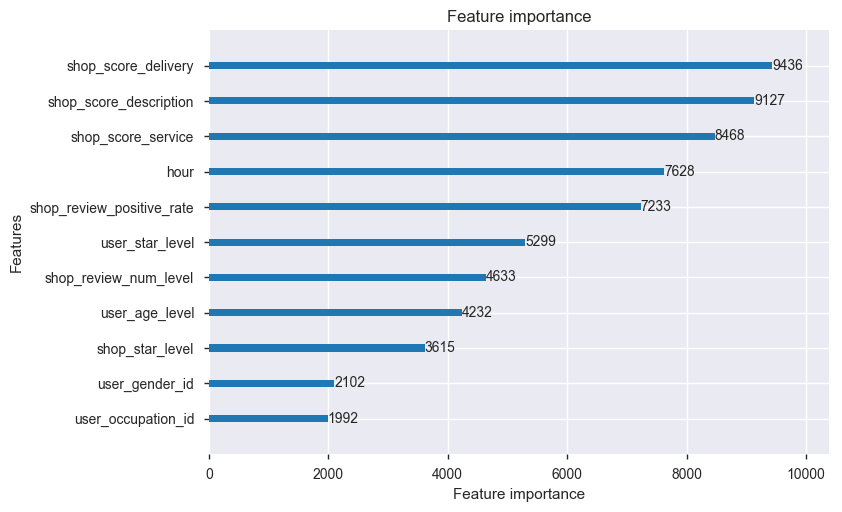

In [23]:
best_iter = lgb_model.best_iteration_

lgb.plot_importance(lgb_model)

In [24]:
train = data[data.is_trade.notnull()]
test = data[data.is_trade.isnull()]

X = train[features]
y = train[target].values

print('Training LGBM model...')
lgb0 = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    num_leaves=32,
    depth=4,
    learning_rate=0.01,
    seed=2018,
    colsample_bytree=0.6,
    subsample=0.9,
    n_estimators=best_iter,
    silent = True)

print('fitting...')
lgb_model = lgb0.fit(X, y)

print('predicting...')
test['predicted_score'] = lgb_model.predict_proba(test[features])[:, 1]

output_file = ['results_0425_1.txt']

print('merging...')
result = test[['instance_id', 'predicted_score']]
result = pd.DataFrame(pd.read_csv(wd+test_file[1], sep=' ')['instance_id']).merge(result, on='instance_id', how='left').fillna(0)

print('\nsaving...')
result.to_csv(wd+output_file[0], sep=' ', index=False)

Training LGBM model...
shop_score_delivery          18899
shop_score_description       18461
shop_score_service           17547
hour                         16048
shop_review_positive_rate    14803
user_star_level              11627
user_age_level                9194
shop_review_num_level         9090
shop_star_level               7307
user_occupation_id            4700
user_gender_id                4105
dtype: int64
(11,)

saving...


## experiment 2

In [31]:
features = ['shop_score_delivery', 'shop_score_description', 'shop_review_positive_rate', 'shop_star_level', 'user_gender_id']
target = 'is_trade'

train = data[(data['day'] >= 18) & (data['day'] <= 23)]
valid = data[(data['day'] == 24)]
test = data[data.is_trade.isnull()]

X = train[features]
y = train[target].values
X_tes = valid[features]
y_tes = valid[target].values

print('Training LGBM model...')
lgb0 = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    num_leaves=16,
    depth=4,
    learning_rate=0.01,
    seed=2018,
    colsample_bytree=0.6,
    subsample=0.9,
    n_estimators=20000,
    silent = True)

lgb_model = lgb0.fit(X, y, eval_set=[(X_tes, y_tes)], early_stopping_rounds=200)

best_iter = lgb_model.best_iteration_


train = data[data.is_trade.notnull()]
test = data[data.is_trade.isnull()]

X = train[features]
y = train[target].values

print('Training LGBM model...')
lgb0 = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    num_leaves=32,
    depth=4,
    learning_rate=0.01,
    seed=2018,
    colsample_bytree=0.6,
    subsample=0.9,
    n_estimators=best_iter,
    silent = True)

print('fitting...')
lgb_model = lgb0.fit(X, y)

print('predicting...')
test['predicted_score'] = lgb_model.predict_proba(test[features])[:, 1]

output_file = ['results_0425_1.txt', 'results_0427_1.txt']

print('merging...')
result = test[['instance_id', 'predicted_score']]
result = pd.DataFrame(pd.read_csv(wd+test_file[1], sep=' ')['instance_id']).merge(result, on='instance_id', how='left').fillna(0)

print('\nsaving...')
result.to_csv(wd+output_file[1], sep=' ', index=False)

Training LGBM model...
[1]	valid_0's binary_logloss: 0.683897
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.674829
[3]	valid_0's binary_logloss: 0.665933
[4]	valid_0's binary_logloss: 0.657212
[5]	valid_0's binary_logloss: 0.648656
[6]	valid_0's binary_logloss: 0.640268
[7]	valid_0's binary_logloss: 0.632034
[8]	valid_0's binary_logloss: 0.623957
[9]	valid_0's binary_logloss: 0.616034
[10]	valid_0's binary_logloss: 0.608255
[11]	valid_0's binary_logloss: 0.600613
[12]	valid_0's binary_logloss: 0.593112
[13]	valid_0's binary_logloss: 0.585748
[14]	valid_0's binary_logloss: 0.578513
[15]	valid_0's binary_logloss: 0.571409
[16]	valid_0's binary_logloss: 0.564427
[17]	valid_0's binary_logloss: 0.55757
[18]	valid_0's binary_logloss: 0.550836
[19]	valid_0's binary_logloss: 0.544211
[20]	valid_0's binary_logloss: 0.537707
[21]	valid_0's binary_logloss: 0.531307
[22]	valid_0's binary_logloss: 0.525022
[23]	valid_0's binary_logloss: 0.51884
[24]	

[203]	valid_0's binary_logloss: 0.125674
[204]	valid_0's binary_logloss: 0.125131
[205]	valid_0's binary_logloss: 0.124596
[206]	valid_0's binary_logloss: 0.124067
[207]	valid_0's binary_logloss: 0.123543
[208]	valid_0's binary_logloss: 0.123024
[209]	valid_0's binary_logloss: 0.122517
[210]	valid_0's binary_logloss: 0.122013
[211]	valid_0's binary_logloss: 0.121514
[212]	valid_0's binary_logloss: 0.121026
[213]	valid_0's binary_logloss: 0.12054
[214]	valid_0's binary_logloss: 0.12006
[215]	valid_0's binary_logloss: 0.119588
[216]	valid_0's binary_logloss: 0.119119
[217]	valid_0's binary_logloss: 0.118659
[218]	valid_0's binary_logloss: 0.118205
[219]	valid_0's binary_logloss: 0.117756
[220]	valid_0's binary_logloss: 0.11731
[221]	valid_0's binary_logloss: 0.116872
[222]	valid_0's binary_logloss: 0.116438
[223]	valid_0's binary_logloss: 0.116011
[224]	valid_0's binary_logloss: 0.115588
[225]	valid_0's binary_logloss: 0.115174
[226]	valid_0's binary_logloss: 0.114761
[227]	valid_0's bin

[407]	valid_0's binary_logloss: 0.0868591
[408]	valid_0's binary_logloss: 0.0868263
[409]	valid_0's binary_logloss: 0.0867865
[410]	valid_0's binary_logloss: 0.0867559
[411]	valid_0's binary_logloss: 0.0867239
[412]	valid_0's binary_logloss: 0.0866923
[413]	valid_0's binary_logloss: 0.0866631
[414]	valid_0's binary_logloss: 0.0866315
[415]	valid_0's binary_logloss: 0.0866009
[416]	valid_0's binary_logloss: 0.0865722
[417]	valid_0's binary_logloss: 0.0865428
[418]	valid_0's binary_logloss: 0.086514
[419]	valid_0's binary_logloss: 0.0864871
[420]	valid_0's binary_logloss: 0.0864589
[421]	valid_0's binary_logloss: 0.08643
[422]	valid_0's binary_logloss: 0.086402
[423]	valid_0's binary_logloss: 0.0863763
[424]	valid_0's binary_logloss: 0.086349
[425]	valid_0's binary_logloss: 0.0863251
[426]	valid_0's binary_logloss: 0.0862998
[427]	valid_0's binary_logloss: 0.0862755
[428]	valid_0's binary_logloss: 0.0862508
[429]	valid_0's binary_logloss: 0.0862255
[430]	valid_0's binary_logloss: 0.08620

[608]	valid_0's binary_logloss: 0.0846253
[609]	valid_0's binary_logloss: 0.0846219
[610]	valid_0's binary_logloss: 0.084618
[611]	valid_0's binary_logloss: 0.0846142
[612]	valid_0's binary_logloss: 0.0846118
[613]	valid_0's binary_logloss: 0.0846101
[614]	valid_0's binary_logloss: 0.0846068
[615]	valid_0's binary_logloss: 0.084603
[616]	valid_0's binary_logloss: 0.0846001
[617]	valid_0's binary_logloss: 0.0845977
[618]	valid_0's binary_logloss: 0.0845962
[619]	valid_0's binary_logloss: 0.0845937
[620]	valid_0's binary_logloss: 0.0845915
[621]	valid_0's binary_logloss: 0.0845881
[622]	valid_0's binary_logloss: 0.0845872
[623]	valid_0's binary_logloss: 0.0845841
[624]	valid_0's binary_logloss: 0.0845816
[625]	valid_0's binary_logloss: 0.084579
[626]	valid_0's binary_logloss: 0.0845773
[627]	valid_0's binary_logloss: 0.0845763
[628]	valid_0's binary_logloss: 0.0845735
[629]	valid_0's binary_logloss: 0.0845721
[630]	valid_0's binary_logloss: 0.0845699
[631]	valid_0's binary_logloss: 0.084

[813]	valid_0's binary_logloss: 0.0843737
[814]	valid_0's binary_logloss: 0.0843715
[815]	valid_0's binary_logloss: 0.0843709
[816]	valid_0's binary_logloss: 0.0843698
[817]	valid_0's binary_logloss: 0.0843691
[818]	valid_0's binary_logloss: 0.0843685
[819]	valid_0's binary_logloss: 0.0843678
[820]	valid_0's binary_logloss: 0.0843658
[821]	valid_0's binary_logloss: 0.0843658
[822]	valid_0's binary_logloss: 0.0843655
[823]	valid_0's binary_logloss: 0.0843658
[824]	valid_0's binary_logloss: 0.0843651
[825]	valid_0's binary_logloss: 0.084364
[826]	valid_0's binary_logloss: 0.0843635
[827]	valid_0's binary_logloss: 0.0843634
[828]	valid_0's binary_logloss: 0.0843636
[829]	valid_0's binary_logloss: 0.0843629
[830]	valid_0's binary_logloss: 0.084363
[831]	valid_0's binary_logloss: 0.0843627
[832]	valid_0's binary_logloss: 0.0843669
[833]	valid_0's binary_logloss: 0.084364
[834]	valid_0's binary_logloss: 0.0843636
[835]	valid_0's binary_logloss: 0.0843618
[836]	valid_0's binary_logloss: 0.084

[1019]	valid_0's binary_logloss: 0.0842323
[1020]	valid_0's binary_logloss: 0.0842319
[1021]	valid_0's binary_logloss: 0.0842314
[1022]	valid_0's binary_logloss: 0.0842315
[1023]	valid_0's binary_logloss: 0.0842308
[1024]	valid_0's binary_logloss: 0.08423
[1025]	valid_0's binary_logloss: 0.0842301
[1026]	valid_0's binary_logloss: 0.0842286
[1027]	valid_0's binary_logloss: 0.0842287
[1028]	valid_0's binary_logloss: 0.0842287
[1029]	valid_0's binary_logloss: 0.0842285
[1030]	valid_0's binary_logloss: 0.0842289
[1031]	valid_0's binary_logloss: 0.0842263
[1032]	valid_0's binary_logloss: 0.0842266
[1033]	valid_0's binary_logloss: 0.0842267
[1034]	valid_0's binary_logloss: 0.0842254
[1035]	valid_0's binary_logloss: 0.0842261
[1036]	valid_0's binary_logloss: 0.0842263
[1037]	valid_0's binary_logloss: 0.0842259
[1038]	valid_0's binary_logloss: 0.0842246
[1039]	valid_0's binary_logloss: 0.0842219
[1040]	valid_0's binary_logloss: 0.0842214
[1041]	valid_0's binary_logloss: 0.0842211
[1042]	valid_

[1218]	valid_0's binary_logloss: 0.0841928
[1219]	valid_0's binary_logloss: 0.0841914
[1220]	valid_0's binary_logloss: 0.0841908
[1221]	valid_0's binary_logloss: 0.0841902
[1222]	valid_0's binary_logloss: 0.0841903
[1223]	valid_0's binary_logloss: 0.0841907
[1224]	valid_0's binary_logloss: 0.0841893
[1225]	valid_0's binary_logloss: 0.0841892
[1226]	valid_0's binary_logloss: 0.0841886
[1227]	valid_0's binary_logloss: 0.0841884
[1228]	valid_0's binary_logloss: 0.0841869
[1229]	valid_0's binary_logloss: 0.0841878
[1230]	valid_0's binary_logloss: 0.0841884
[1231]	valid_0's binary_logloss: 0.0841886
[1232]	valid_0's binary_logloss: 0.0841884
[1233]	valid_0's binary_logloss: 0.084187
[1234]	valid_0's binary_logloss: 0.0841875
[1235]	valid_0's binary_logloss: 0.0841876
[1236]	valid_0's binary_logloss: 0.084187
[1237]	valid_0's binary_logloss: 0.0841871
[1238]	valid_0's binary_logloss: 0.0841861
[1239]	valid_0's binary_logloss: 0.0841858
[1240]	valid_0's binary_logloss: 0.0841856
[1241]	valid_

[1413]	valid_0's binary_logloss: 0.0841258
[1414]	valid_0's binary_logloss: 0.0841274
[1415]	valid_0's binary_logloss: 0.0841277
[1416]	valid_0's binary_logloss: 0.0841277
[1417]	valid_0's binary_logloss: 0.084127
[1418]	valid_0's binary_logloss: 0.084126
[1419]	valid_0's binary_logloss: 0.0841261
[1420]	valid_0's binary_logloss: 0.0841261
[1421]	valid_0's binary_logloss: 0.084126
[1422]	valid_0's binary_logloss: 0.084126
[1423]	valid_0's binary_logloss: 0.0841284
[1424]	valid_0's binary_logloss: 0.0841256
[1425]	valid_0's binary_logloss: 0.0841268
[1426]	valid_0's binary_logloss: 0.0841265
[1427]	valid_0's binary_logloss: 0.084125
[1428]	valid_0's binary_logloss: 0.0841253
[1429]	valid_0's binary_logloss: 0.0841252
[1430]	valid_0's binary_logloss: 0.0841241
[1431]	valid_0's binary_logloss: 0.084125
[1432]	valid_0's binary_logloss: 0.0841246
[1433]	valid_0's binary_logloss: 0.0841244
[1434]	valid_0's binary_logloss: 0.0841238
[1435]	valid_0's binary_logloss: 0.0841242
[1436]	valid_0's 

[1615]	valid_0's binary_logloss: 0.0840857
[1616]	valid_0's binary_logloss: 0.0840854
[1617]	valid_0's binary_logloss: 0.0840856
[1618]	valid_0's binary_logloss: 0.0840851
[1619]	valid_0's binary_logloss: 0.0840828
[1620]	valid_0's binary_logloss: 0.0840829
[1621]	valid_0's binary_logloss: 0.0840822
[1622]	valid_0's binary_logloss: 0.084082
[1623]	valid_0's binary_logloss: 0.084082
[1624]	valid_0's binary_logloss: 0.0840817
[1625]	valid_0's binary_logloss: 0.0840809
[1626]	valid_0's binary_logloss: 0.0840817
[1627]	valid_0's binary_logloss: 0.0840831
[1628]	valid_0's binary_logloss: 0.084083
[1629]	valid_0's binary_logloss: 0.0840825
[1630]	valid_0's binary_logloss: 0.0840822
[1631]	valid_0's binary_logloss: 0.0840819
[1632]	valid_0's binary_logloss: 0.0840819
[1633]	valid_0's binary_logloss: 0.0840818
[1634]	valid_0's binary_logloss: 0.0840816
[1635]	valid_0's binary_logloss: 0.0840772
[1636]	valid_0's binary_logloss: 0.0840775
[1637]	valid_0's binary_logloss: 0.0840771
[1638]	valid_0

[1816]	valid_0's binary_logloss: 0.0840445
[1817]	valid_0's binary_logloss: 0.0840442
[1818]	valid_0's binary_logloss: 0.0840444
[1819]	valid_0's binary_logloss: 0.0840445
[1820]	valid_0's binary_logloss: 0.0840428
[1821]	valid_0's binary_logloss: 0.0840417
[1822]	valid_0's binary_logloss: 0.0840415
[1823]	valid_0's binary_logloss: 0.0840413
[1824]	valid_0's binary_logloss: 0.084041
[1825]	valid_0's binary_logloss: 0.0840411
[1826]	valid_0's binary_logloss: 0.0840416
[1827]	valid_0's binary_logloss: 0.0840408
[1828]	valid_0's binary_logloss: 0.0840407
[1829]	valid_0's binary_logloss: 0.0840408
[1830]	valid_0's binary_logloss: 0.0840419
[1831]	valid_0's binary_logloss: 0.0840424
[1832]	valid_0's binary_logloss: 0.0840422
[1833]	valid_0's binary_logloss: 0.0840422
[1834]	valid_0's binary_logloss: 0.0840423
[1835]	valid_0's binary_logloss: 0.0840422
[1836]	valid_0's binary_logloss: 0.0840414
[1837]	valid_0's binary_logloss: 0.0840397
[1838]	valid_0's binary_logloss: 0.08404
[1839]	valid_0

[2008]	valid_0's binary_logloss: 0.0840306
[2009]	valid_0's binary_logloss: 0.0840314
[2010]	valid_0's binary_logloss: 0.0840305
[2011]	valid_0's binary_logloss: 0.0840307
[2012]	valid_0's binary_logloss: 0.0840312
[2013]	valid_0's binary_logloss: 0.0840314
[2014]	valid_0's binary_logloss: 0.084032
[2015]	valid_0's binary_logloss: 0.0840328
[2016]	valid_0's binary_logloss: 0.0840327
[2017]	valid_0's binary_logloss: 0.0840325
[2018]	valid_0's binary_logloss: 0.0840318
[2019]	valid_0's binary_logloss: 0.0840319
[2020]	valid_0's binary_logloss: 0.0840322
[2021]	valid_0's binary_logloss: 0.0840327
[2022]	valid_0's binary_logloss: 0.084033
[2023]	valid_0's binary_logloss: 0.0840331
[2024]	valid_0's binary_logloss: 0.0840328
[2025]	valid_0's binary_logloss: 0.0840322
[2026]	valid_0's binary_logloss: 0.0840323
[2027]	valid_0's binary_logloss: 0.0840325
[2028]	valid_0's binary_logloss: 0.084033
[2029]	valid_0's binary_logloss: 0.0840336
[2030]	valid_0's binary_logloss: 0.0840339
[2031]	valid_0

[2200]	valid_0's binary_logloss: 0.0840224
[2201]	valid_0's binary_logloss: 0.0840225
[2202]	valid_0's binary_logloss: 0.0840229
[2203]	valid_0's binary_logloss: 0.0840229
[2204]	valid_0's binary_logloss: 0.0840226
[2205]	valid_0's binary_logloss: 0.0840226
[2206]	valid_0's binary_logloss: 0.0840233
[2207]	valid_0's binary_logloss: 0.0840227
[2208]	valid_0's binary_logloss: 0.0840227
[2209]	valid_0's binary_logloss: 0.0840227
[2210]	valid_0's binary_logloss: 0.084023
[2211]	valid_0's binary_logloss: 0.084023
[2212]	valid_0's binary_logloss: 0.0840221
[2213]	valid_0's binary_logloss: 0.0840218
[2214]	valid_0's binary_logloss: 0.084021
[2215]	valid_0's binary_logloss: 0.0840207
[2216]	valid_0's binary_logloss: 0.0840203
[2217]	valid_0's binary_logloss: 0.0840203
[2218]	valid_0's binary_logloss: 0.0840204
[2219]	valid_0's binary_logloss: 0.0840207
[2220]	valid_0's binary_logloss: 0.0840207
[2221]	valid_0's binary_logloss: 0.0840207
[2222]	valid_0's binary_logloss: 0.0840203
[2223]	valid_0

[2395]	valid_0's binary_logloss: 0.083999
[2396]	valid_0's binary_logloss: 0.0839986
[2397]	valid_0's binary_logloss: 0.0839988
[2398]	valid_0's binary_logloss: 0.0839991
[2399]	valid_0's binary_logloss: 0.0839989
[2400]	valid_0's binary_logloss: 0.0839985
[2401]	valid_0's binary_logloss: 0.0839986
[2402]	valid_0's binary_logloss: 0.0839989
[2403]	valid_0's binary_logloss: 0.0839991
[2404]	valid_0's binary_logloss: 0.0839997
[2405]	valid_0's binary_logloss: 0.0840001
[2406]	valid_0's binary_logloss: 0.0840005
[2407]	valid_0's binary_logloss: 0.0840005
[2408]	valid_0's binary_logloss: 0.0840011
[2409]	valid_0's binary_logloss: 0.084001
[2410]	valid_0's binary_logloss: 0.0840002
[2411]	valid_0's binary_logloss: 0.0839999
[2412]	valid_0's binary_logloss: 0.0840008
[2413]	valid_0's binary_logloss: 0.0840014
[2414]	valid_0's binary_logloss: 0.0840014
[2415]	valid_0's binary_logloss: 0.0840008
[2416]	valid_0's binary_logloss: 0.084002
[2417]	valid_0's binary_logloss: 0.084002
[2418]	valid_0'

[2593]	valid_0's binary_logloss: 0.0839921
[2594]	valid_0's binary_logloss: 0.0839924
[2595]	valid_0's binary_logloss: 0.0839923
[2596]	valid_0's binary_logloss: 0.0839921
[2597]	valid_0's binary_logloss: 0.0839923
[2598]	valid_0's binary_logloss: 0.0839925
[2599]	valid_0's binary_logloss: 0.0839921
[2600]	valid_0's binary_logloss: 0.0839924
[2601]	valid_0's binary_logloss: 0.0839927
[2602]	valid_0's binary_logloss: 0.0839924
[2603]	valid_0's binary_logloss: 0.0839926
[2604]	valid_0's binary_logloss: 0.0839926
[2605]	valid_0's binary_logloss: 0.0839931
[2606]	valid_0's binary_logloss: 0.0839932
[2607]	valid_0's binary_logloss: 0.0839938
[2608]	valid_0's binary_logloss: 0.0839943
[2609]	valid_0's binary_logloss: 0.0839945
[2610]	valid_0's binary_logloss: 0.0839953
[2611]	valid_0's binary_logloss: 0.0839948
[2612]	valid_0's binary_logloss: 0.0839946
[2613]	valid_0's binary_logloss: 0.0839942
[2614]	valid_0's binary_logloss: 0.0839937
[2615]	valid_0's binary_logloss: 0.0839936
[2616]	vali

[2785]	valid_0's binary_logloss: 0.083981
[2786]	valid_0's binary_logloss: 0.0839809
[2787]	valid_0's binary_logloss: 0.083981
[2788]	valid_0's binary_logloss: 0.0839802
[2789]	valid_0's binary_logloss: 0.0839804
[2790]	valid_0's binary_logloss: 0.0839792
[2791]	valid_0's binary_logloss: 0.0839789
[2792]	valid_0's binary_logloss: 0.0839788
[2793]	valid_0's binary_logloss: 0.0839785
[2794]	valid_0's binary_logloss: 0.0839792
[2795]	valid_0's binary_logloss: 0.0839808
[2796]	valid_0's binary_logloss: 0.0839812
[2797]	valid_0's binary_logloss: 0.0839806
[2798]	valid_0's binary_logloss: 0.0839809
[2799]	valid_0's binary_logloss: 0.0839803
[2800]	valid_0's binary_logloss: 0.0839795
[2801]	valid_0's binary_logloss: 0.0839793
[2802]	valid_0's binary_logloss: 0.0839784
[2803]	valid_0's binary_logloss: 0.0839785
[2804]	valid_0's binary_logloss: 0.0839783
[2805]	valid_0's binary_logloss: 0.083978
[2806]	valid_0's binary_logloss: 0.0839784
[2807]	valid_0's binary_logloss: 0.083978
[2808]	valid_0'

[2986]	valid_0's binary_logloss: 0.0839688
[2987]	valid_0's binary_logloss: 0.083969
[2988]	valid_0's binary_logloss: 0.0839688
[2989]	valid_0's binary_logloss: 0.083968
[2990]	valid_0's binary_logloss: 0.083968
[2991]	valid_0's binary_logloss: 0.0839677
[2992]	valid_0's binary_logloss: 0.0839675
[2993]	valid_0's binary_logloss: 0.0839677
[2994]	valid_0's binary_logloss: 0.0839681
[2995]	valid_0's binary_logloss: 0.0839679
[2996]	valid_0's binary_logloss: 0.0839686
[2997]	valid_0's binary_logloss: 0.0839684
[2998]	valid_0's binary_logloss: 0.0839685
[2999]	valid_0's binary_logloss: 0.0839691
[3000]	valid_0's binary_logloss: 0.0839688
[3001]	valid_0's binary_logloss: 0.0839689
[3002]	valid_0's binary_logloss: 0.0839695
[3003]	valid_0's binary_logloss: 0.0839694
[3004]	valid_0's binary_logloss: 0.0839691
[3005]	valid_0's binary_logloss: 0.0839684
[3006]	valid_0's binary_logloss: 0.0839684
[3007]	valid_0's binary_logloss: 0.083968
[3008]	valid_0's binary_logloss: 0.0839688
[3009]	valid_0'

[3183]	valid_0's binary_logloss: 0.0839646
[3184]	valid_0's binary_logloss: 0.0839641
[3185]	valid_0's binary_logloss: 0.0839636
[3186]	valid_0's binary_logloss: 0.0839638
[3187]	valid_0's binary_logloss: 0.083964
[3188]	valid_0's binary_logloss: 0.0839637
[3189]	valid_0's binary_logloss: 0.0839623
[3190]	valid_0's binary_logloss: 0.0839626
[3191]	valid_0's binary_logloss: 0.0839622
[3192]	valid_0's binary_logloss: 0.0839615
[3193]	valid_0's binary_logloss: 0.0839612
[3194]	valid_0's binary_logloss: 0.0839607
[3195]	valid_0's binary_logloss: 0.0839617
[3196]	valid_0's binary_logloss: 0.0839606
[3197]	valid_0's binary_logloss: 0.0839606
[3198]	valid_0's binary_logloss: 0.0839596
[3199]	valid_0's binary_logloss: 0.0839594
[3200]	valid_0's binary_logloss: 0.0839597
[3201]	valid_0's binary_logloss: 0.0839595
[3202]	valid_0's binary_logloss: 0.0839599
[3203]	valid_0's binary_logloss: 0.0839602
[3204]	valid_0's binary_logloss: 0.0839601
[3205]	valid_0's binary_logloss: 0.0839603
[3206]	valid

[3374]	valid_0's binary_logloss: 0.0839606
[3375]	valid_0's binary_logloss: 0.0839607
[3376]	valid_0's binary_logloss: 0.0839609
[3377]	valid_0's binary_logloss: 0.0839604
[3378]	valid_0's binary_logloss: 0.0839604
[3379]	valid_0's binary_logloss: 0.0839602
[3380]	valid_0's binary_logloss: 0.0839599
[3381]	valid_0's binary_logloss: 0.0839593
[3382]	valid_0's binary_logloss: 0.0839583
[3383]	valid_0's binary_logloss: 0.0839584
[3384]	valid_0's binary_logloss: 0.0839585
[3385]	valid_0's binary_logloss: 0.0839593
[3386]	valid_0's binary_logloss: 0.0839592
[3387]	valid_0's binary_logloss: 0.0839595
[3388]	valid_0's binary_logloss: 0.08396
[3389]	valid_0's binary_logloss: 0.08396
[3390]	valid_0's binary_logloss: 0.0839601
[3391]	valid_0's binary_logloss: 0.0839604
[3392]	valid_0's binary_logloss: 0.0839604
[3393]	valid_0's binary_logloss: 0.0839608
[3394]	valid_0's binary_logloss: 0.0839613
[3395]	valid_0's binary_logloss: 0.0839607
[3396]	valid_0's binary_logloss: 0.0839605
[3397]	valid_0'

[3574]	valid_0's binary_logloss: 0.0839532
[3575]	valid_0's binary_logloss: 0.0839527
[3576]	valid_0's binary_logloss: 0.0839524
[3577]	valid_0's binary_logloss: 0.0839523
[3578]	valid_0's binary_logloss: 0.083952
[3579]	valid_0's binary_logloss: 0.0839519
[3580]	valid_0's binary_logloss: 0.083952
[3581]	valid_0's binary_logloss: 0.0839523
[3582]	valid_0's binary_logloss: 0.083953
[3583]	valid_0's binary_logloss: 0.083953
[3584]	valid_0's binary_logloss: 0.0839526
[3585]	valid_0's binary_logloss: 0.0839524
[3586]	valid_0's binary_logloss: 0.0839529
[3587]	valid_0's binary_logloss: 0.083953
[3588]	valid_0's binary_logloss: 0.0839539
[3589]	valid_0's binary_logloss: 0.0839528
[3590]	valid_0's binary_logloss: 0.0839535
[3591]	valid_0's binary_logloss: 0.0839534
[3592]	valid_0's binary_logloss: 0.0839537
[3593]	valid_0's binary_logloss: 0.0839546
[3594]	valid_0's binary_logloss: 0.0839548
[3595]	valid_0's binary_logloss: 0.083955
[3596]	valid_0's binary_logloss: 0.0839551
[3597]	valid_0's 

[3767]	valid_0's binary_logloss: 0.0839441
[3768]	valid_0's binary_logloss: 0.0839441
[3769]	valid_0's binary_logloss: 0.0839434
[3770]	valid_0's binary_logloss: 0.0839434
[3771]	valid_0's binary_logloss: 0.0839429
[3772]	valid_0's binary_logloss: 0.0839426
[3773]	valid_0's binary_logloss: 0.0839419
[3774]	valid_0's binary_logloss: 0.0839415
[3775]	valid_0's binary_logloss: 0.0839414
[3776]	valid_0's binary_logloss: 0.083942
[3777]	valid_0's binary_logloss: 0.0839428
[3778]	valid_0's binary_logloss: 0.0839427
[3779]	valid_0's binary_logloss: 0.0839423
[3780]	valid_0's binary_logloss: 0.0839425
[3781]	valid_0's binary_logloss: 0.0839429
[3782]	valid_0's binary_logloss: 0.0839427
[3783]	valid_0's binary_logloss: 0.0839432
[3784]	valid_0's binary_logloss: 0.0839423
[3785]	valid_0's binary_logloss: 0.0839421
[3786]	valid_0's binary_logloss: 0.0839415
[3787]	valid_0's binary_logloss: 0.0839418
[3788]	valid_0's binary_logloss: 0.0839419
[3789]	valid_0's binary_logloss: 0.0839418
[3790]	valid

[3959]	valid_0's binary_logloss: 0.0839463
[3960]	valid_0's binary_logloss: 0.0839461
[3961]	valid_0's binary_logloss: 0.0839462
[3962]	valid_0's binary_logloss: 0.083946
[3963]	valid_0's binary_logloss: 0.0839461
[3964]	valid_0's binary_logloss: 0.0839461
[3965]	valid_0's binary_logloss: 0.0839463
[3966]	valid_0's binary_logloss: 0.0839466
[3967]	valid_0's binary_logloss: 0.0839467
[3968]	valid_0's binary_logloss: 0.0839461
[3969]	valid_0's binary_logloss: 0.0839446
[3970]	valid_0's binary_logloss: 0.083945
[3971]	valid_0's binary_logloss: 0.0839452
[3972]	valid_0's binary_logloss: 0.0839453
[3973]	valid_0's binary_logloss: 0.0839454
[3974]	valid_0's binary_logloss: 0.0839454
[3975]	valid_0's binary_logloss: 0.0839452
[3976]	valid_0's binary_logloss: 0.0839456
[3977]	valid_0's binary_logloss: 0.0839457
[3978]	valid_0's binary_logloss: 0.0839458
[3979]	valid_0's binary_logloss: 0.0839456
[3980]	valid_0's binary_logloss: 0.0839482
[3981]	valid_0's binary_logloss: 0.0839481
[3982]	valid_